### Import configuration and data.

In [1]:
%load_ext autoreload
%autoreload 2

from trainer import *

trainer = load_trainer(path='../output/SNL_MSU_DOE_avg/trainer.pkl')

### Gaussian process-based Bayes hyperparameter optimization (Optional)

### Training

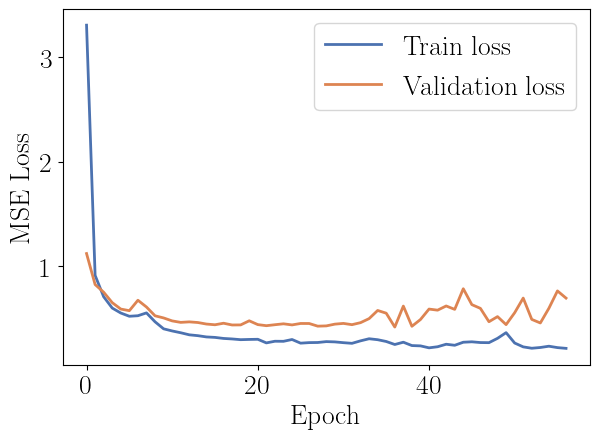

In [2]:
trainer.plot_loss()

### Plotting predictions and comparing with baseline models.

Train Loss: 0.2215, R2: 0.8705
Validation Loss: 0.4157, R2: 0.7467
Test Loss: 0.4006, R2: 0.7116


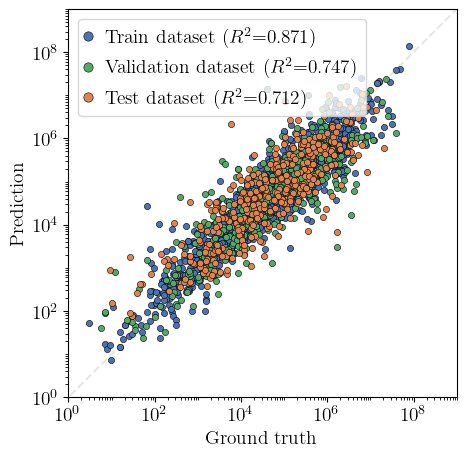

In [3]:
trainer.plot_truth_pred()

### Permutation feature importance

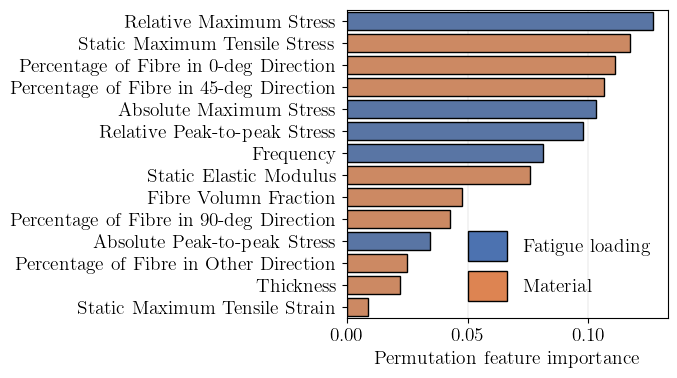

In [4]:
trainer.plot_feature_importance()

### Partial dependence

Calculate PDP:  Percentage of Fibre in 0-deg Direction
Calculate PDP:  Percentage of Fibre in 45-deg Direction
Calculate PDP:  Percentage of Fibre in 90-deg Direction
Calculate PDP:  Percentage of Fibre in Other Direction
Calculate PDP:  Absolute Maximum Stress
Calculate PDP:  Absolute Peak-to-peak Stress
Calculate PDP:  Frequency
Calculate PDP:  Fibre Volumn Fraction
Calculate PDP:  Relative Maximum Stress
Calculate PDP:  Relative Peak-to-peak Stress
Calculate PDP:  Thickness
Calculate PDP:  Static Maximum Tensile Stress
Calculate PDP:  Static Maximum Tensile Strain
Calculate PDP:  Static Elastic Modulus


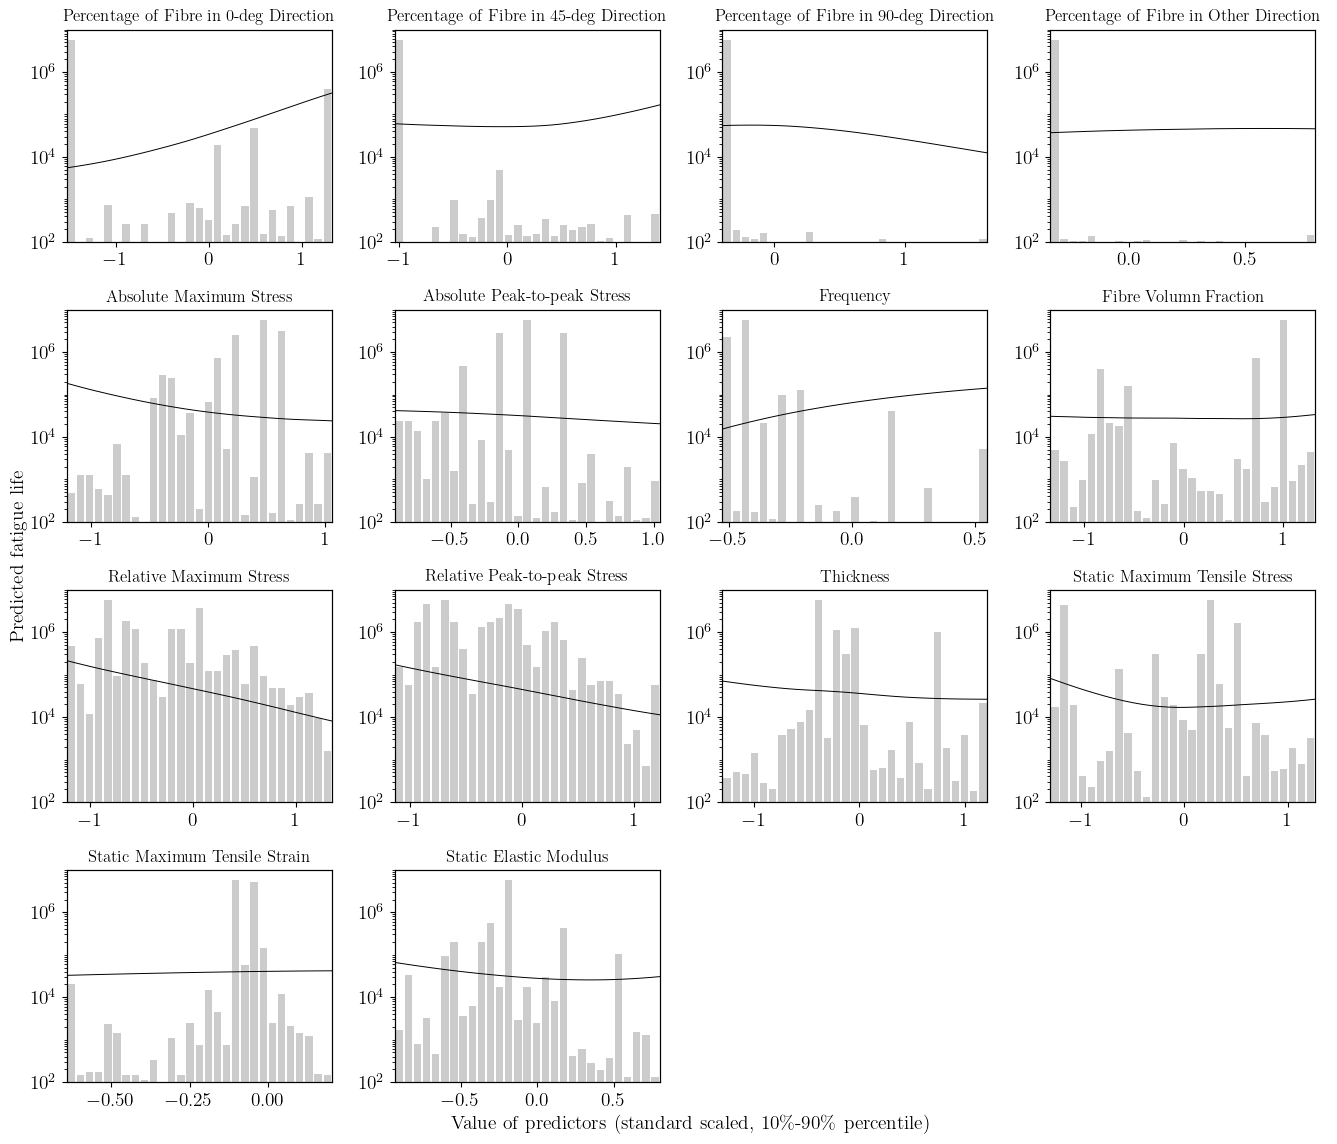

In [5]:
trainer.plot_partial_dependence()

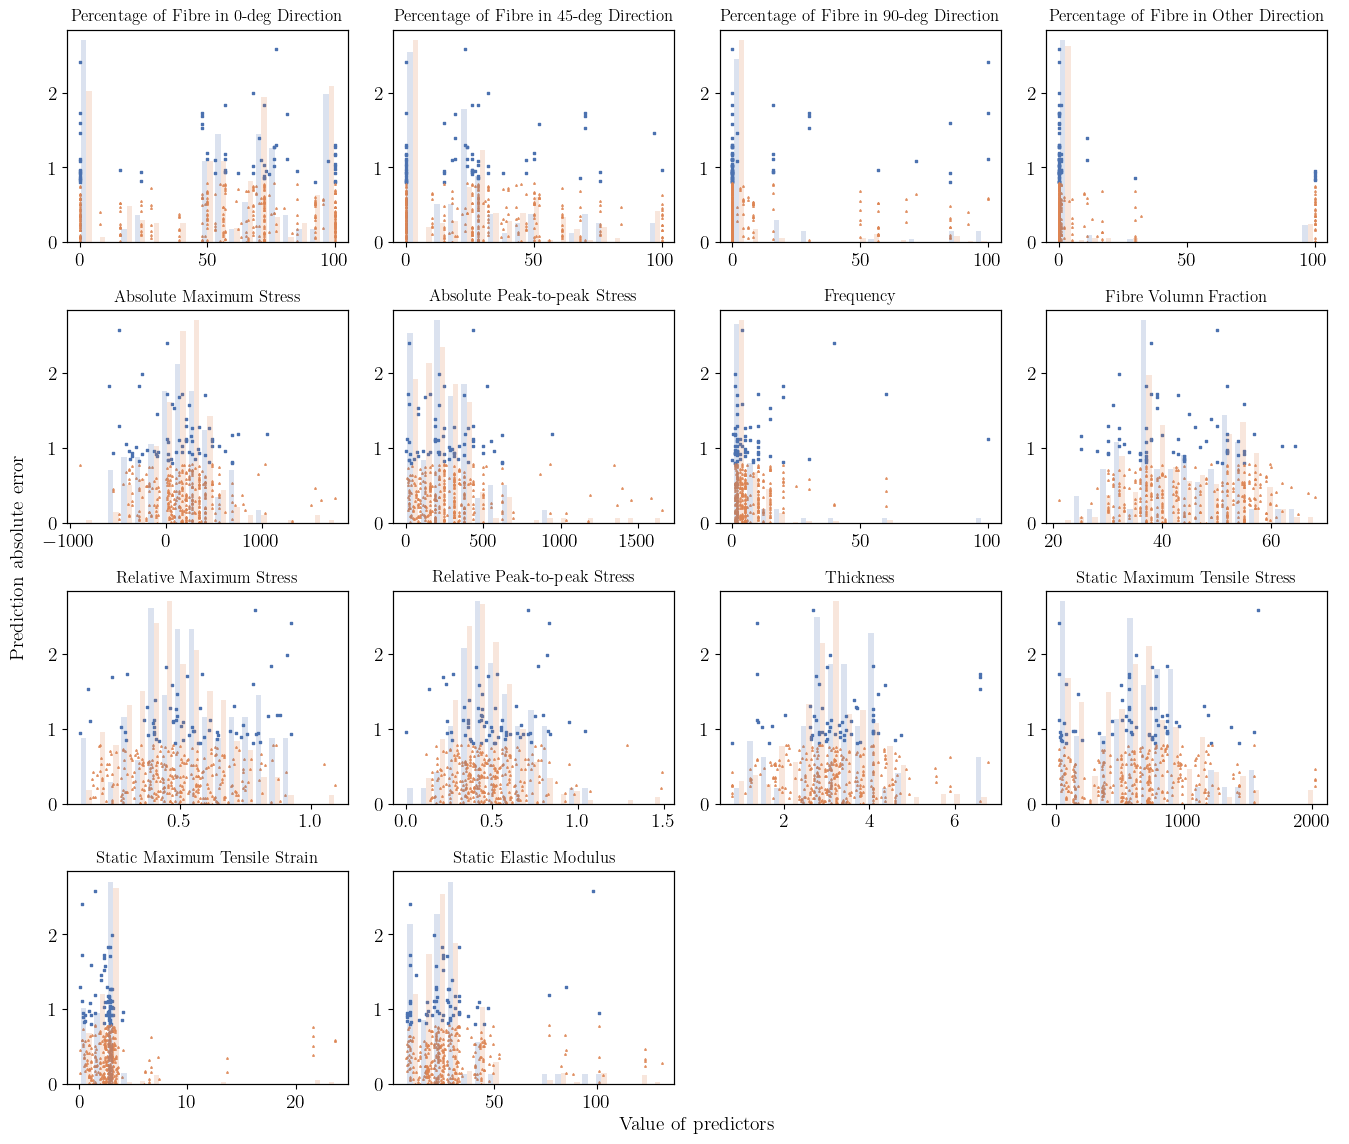

In [6]:
trainer.plot_partial_err()

## Baseline models

In [6]:
trainer.get_leaderboard(test_data_only=False)

Pytorch-Tabular metrics
AutoGluon metrics
This work metrics
TabNet metrics


,Program,Model,Train RMSE,Train MSE,Train MAE,Train MAPE,Train R2,Test RMSE,Test MSE,Test MAE,Test MAPE,Test R2,Validation RMSE,Validation MSE,Validation MAE,Validation MAPE,Validation R2
0,AutoGluon,WeightedEnsemble_L2,2.988642e-01,8.931979e-02,2.238392e-01,5.810272e-02,0.947788,0.537461,0.288864,0.386095,0.096604,0.792075,0.603532,0.364251,0.426917,0.107267,0.778031
1,AutoGluon,LightGBM_BAG_L2/T0,3.149414e-01,9.918806e-02,2.279957e-01,6.060345e-02,0.942020,0.541331,0.293040,0.397991,0.098832,0.789070,0.609985,0.372081,0.432828,0.110017,0.773260
2,AutoGluon,LightGBMXT_BAG_L1/T0,2.671716e-01,7.138064e-02,1.934738e-01,5.034118e-02,0.958275,0.542669,0.294489,0.384957,0.096258,0.788026,0.608316,0.370048,0.424720,0.106974,0.774499
3,AutoGluon,RandomForestMSE_BAG_L2/T0,3.073213e-01,9.444637e-02,2.142362e-01,5.599096e-02,0.944792,0.543184,0.295049,0.395017,0.097057,0.787623,0.617299,0.381058,0.432387,0.108302,0.767789
4,AutoGluon,WeightedEnsemble_L3,2.866402e-01,8.216259e-02,2.046241e-01,5.213722e-02,0.951972,0.546204,0.298339,0.391820,0.098030,0.785255,0.594258,0.353143,0.422233,0.105459,0.784800
5,AutoGluon,LightGBMXT_BAG_L2/T0,2.890658e-01,8.355904e-02,2.094470e-01,5.659093e-02,0.951156,0.546789,0.298978,0.396634,0.098951,0.784796,0.609827,0.371889,0.435916,0.110792,0.773377
6,AutoGluon,CatBoost_BAG_L2/T0,2.812178e-01,7.908346e-02,2.056327e-01,5.464369e-02,0.953772,0.548555,0.300912,0.396327,0.099637,0.783403,0.609446,0.371425,0.435979,0.109598,0.773660
7,AutoGluon,ExtraTreesMSE_BAG_L2/T0,3.003362e-01,9.020182e-02,2.109315e-01,5.505588e-02,0.947273,0.548796,0.301178,0.396932,0.097836,0.783212,0.615896,0.379327,0.430490,0.107359,0.768844
8,AutoGluon,NeuralNetFastAI_BAG_L2/T0,2.888956e-01,8.346068e-02,2.075250e-01,5.287885e-02,0.951213,0.550117,0.302628,0.394151,0.098636,0.782168,0.594807,0.353795,0.423276,0.105365,0.784403
9,AutoGluon,LightGBMLarge_BAG_L2,3.298488e-01,1.088003e-01,2.360186e-01,6.208148e-02,0.936401,0.550396,0.302936,0.400615,0.099226,0.781947,0.618808,0.382923,0.441672,0.112265,0.766653


In [8]:
trainer.plot_truth_pred(program='pytorch_tabular')

Making baseline predictions...
TabTransformerModel 1/5
AutoIntModel 2/5
CategoryEmbeddingModel 3/5
TabNetModel 4/5
NODEModel 5/5
Plotting...
TabTransformerModel 1/5
Train Loss: 0.1627, R2: 0.9049
Validation Loss: 0.3790, R2: 0.7691
Test Loss: 0.3434, R2: 0.7528
AutoIntModel 2/5
Train Loss: 0.4827, R2: 0.7178
Validation Loss: 0.5566, R2: 0.6608
Test Loss: 0.4889, R2: 0.6481
CategoryEmbeddingModel 3/5
Train Loss: 0.5091, R2: 0.7024
Validation Loss: 0.5828, R2: 0.6449
Test Loss: 0.5066, R2: 0.6354
TabNetModel 4/5
Train Loss: 0.5510, R2: 0.6779
Validation Loss: 0.6334, R2: 0.6140
Test Loss: 0.5300, R2: 0.6185
NODEModel 5/5
Train Loss: 0.7792, R2: 0.5445
Validation Loss: 0.8062, R2: 0.5087
Test Loss: 0.6501, R2: 0.5321


In [9]:
trainer.plot_truth_pred(program='autogluon')

Making baseline predictions...
LightGBMXT_BAG_L1/T0 1/22
NeuralNetFastAI_BAG_L2/T0 2/22
WeightedEnsemble_L3 3/22
WeightedEnsemble_L2 4/22
CatBoost_BAG_L1/T0 5/22
RandomForestMSE_BAG_L2/T0 6/22
NeuralNetMXNet_BAG_L2/T0 7/22
CatBoost_BAG_L2/T0 8/22
ExtraTreesMSE_BAG_L2/T0 9/22
LightGBMXT_BAG_L2/T0 10/22
XGBoost_BAG_L2/T0 11/22
LightGBM_BAG_L2/T0 12/22
LightGBM_BAG_L1/T0 13/22
LightGBMLarge_BAG_L2 14/22
XGBoost_BAG_L1/T0 15/22
LightGBMLarge_BAG_L1 16/22
ExtraTreesMSE_BAG_L1/T0 17/22
NeuralNetFastAI_BAG_L1/T0 18/22
NeuralNetMXNet_BAG_L1/T0 19/22
RandomForestMSE_BAG_L1/T0 20/22
KNeighborsDist_BAG_L1/T0 21/22
KNeighborsUnif_BAG_L1/T0 22/22
Plotting...
LightGBMXT_BAG_L1/T0 1/22
Train Loss: 0.0711, R2: 0.9580
Test Loss: 0.2539, R2: 0.8172
NeuralNetFastAI_BAG_L2/T0 2/22
Train Loss: 0.0799, R2: 0.9528
Test Loss: 0.2562, R2: 0.8156
WeightedEnsemble_L3 3/22
Train Loss: 0.0757, R2: 0.9553
Test Loss: 0.2584, R2: 0.8140
WeightedEnsemble_L2 4/22
Train Loss: 0.0763, R2: 0.9549
Test Loss: 0.2605, R2: 0.

In [5]:
trainer.tabnet_tests()


-------------Run TabNet Test-------------

{'n_d': 8, 'n_a': 8, 'n_steps': 3, 'gamma': 1.3, 'n_independent': 2, 'n_shared': 2} 55.538790083773016
{'n_d': 40, 'n_a': 55, 'n_steps': 9, 'gamma': 1.8472517387841256, 'n_independent': 3, 'n_shared': 3} 12883.963693655638
{'n_d': 22, 'n_a': 7, 'n_steps': 5, 'gamma': 1.47766511732135, 'n_independent': 4, 'n_shared': 3} 3464.5849848599973
{'n_d': 28, 'n_a': 54, 'n_steps': 5, 'gamma': 1.6481718720511973, 'n_independent': 2, 'n_shared': 5} 9491.025384351258
{'n_d': 12, 'n_a': 56, 'n_steps': 6, 'gamma': 1.8009107519796443, 'n_independent': 3, 'n_shared': 4} 8791.42653102161
{'n_d': 47, 'n_a': 39, 'n_steps': 7, 'gamma': 1.7586156243223574, 'n_independent': 1, 'n_shared': 3} 1340.078524321135
{'n_d': 15, 'n_a': 48, 'n_steps': 5, 'gamma': 1.135218173405452, 'n_independent': 2, 'n_shared': 2} 285.7699062588026
{'n_d': 17, 'n_a': 27, 'n_steps': 9, 'gamma': 1.4499499899112278, 'n_independent': 3, 'n_shared': 5} 24908.37107457181
{'n_d': 10, 'n_a': 62, 

/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293


/home/xlluo/anaconda3/envs/ML-fracture/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 31.203859901040293
{'n_d': 8, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0, 'n_independent': 2, 'n_shared': 2} 202.79427131486335
{'n_d': 4, 'n_a': 62, 'n_steps': 3, 'gamma': 1.8035190207666518, 'n_independent': 2, 'n_shared': 2} 36.48775332197451
{'n_d': 4, 'n_a': 37, 'n_steps': 3, 'gamma': 1.1009664012940474, 'n_independent': 2, 'n_shared': 2} 37.33807220776038
{'n_d': 4, 'n_a': 18, 'n_steps': 3, 'gamma': 1.237119042820102, 'n_independent': 2, 'n_shared': 2} 39.877398807152616
{'n_d': 4, 'n_a': 44, 'n_steps': 3, 'gamma': 1.394991830047406, 'n_independent': 2, 'n_shared': 2} 42.3056994841498
{'n_d': 4, 'n_a': 29, 'n_steps': 3, 'gamma': 1.3875927914800044, 'n_independent': 2, 'n_shared': 2} 41.132752748948484
{'n_d': 4, 'n_a': 16, 'n_steps': 3, 'gamma': 1.4882238179325906, 'n_independent': 2, 'n_shared': 2} 36.98943549177945
{'n_d': 4, 'n_a': 4, 'n_steps': 3, 'gamma': 1.0645739507152576, 'n_independent': 2, 'n_